# Plant Disease Detection

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70291 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [5]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Model Training

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=25)

Epoch 1/25
2197/2197 [==============================] - 210s 94ms/step - loss: 1.4385 - accuracy: 0.5785 - val_loss: 0.4621 - val_accuracy: 0.8561
Epoch 2/25
2197/2197 [==============================] - 206s 93ms/step - loss: 0.4548 - accuracy: 0.8545 - val_loss: 0.2805 - val_accuracy: 0.9086
Epoch 3/25
2197/2197 [==============================] - 211s 96ms/step - loss: 0.2692 - accuracy: 0.9125 - val_loss: 0.2175 - val_accuracy: 0.9328
Epoch 4/25
2197/2197 [==============================] - 211s 96ms/step - loss: 0.1819 - accuracy: 0.9404 - val_loss: 0.1743 - val_accuracy: 0.9438
Epoch 5/25
2197/2197 [==============================] - 209s 95ms/step - loss: 0.1399 - accuracy: 0.9542 - val_loss: 0.1332 - val_accuracy: 0.9566
Epoch 6/25
2197/2197 [==============================] - 211s 96ms/step - loss: 0.1085 - accuracy: 0.9639 - val_loss: 0.1456 - val_accuracy: 0.9534
Epoch 7/25
2197/2197 [==============================] - 211s 96ms/step - loss: 0.0848 - accuracy: 0.9725 - val_loss: 0

# Using Resnet

In [19]:
# import tensorflow
# from tensorflow import keras
# from keras.models import Sequential,load_model,Model
# from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
# from keras.optimizers import SGD
# from keras.initializers import glorot_uniform
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input

In [20]:
# base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)

In [21]:
# #Model building
# base_model_tf.trainable=False

# pt=Input(shape=(224,224,3))
# func=tensorflow.cast(pt,tensorflow.float32)
# x=preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset
# model_resnet=base_model_tf(x,training=False)
# model_resnet=GlobalAveragePooling2D()(model_resnet)
# model_resnet=Dense(128,activation='relu')(model_resnet)
# model_resnet=Dense(64,activation='relu')(model_resnet)
# model_resnet=Dense(38,activation='softmax')(model_resnet)


# model_main=Model(inputs=pt,outputs=model_resnet)
# model_main.summary()

# Model training using ResNet

In [22]:
# train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
#                                   ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

# val_datagen=ImageDataGenerator()

# path_train='train'

# path_valid='valid'

# train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
#                                          color_mode='rgb',class_mode='categorical',seed=42)

# valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

In [23]:
# es=EarlyStopping(monitor='val_accuracy',verbose=1,patience=7,mode='auto')
# mc=ModelCheckpoint(filepath='./',monitor='val_accuracy',verbose=1,save_best_only=True)
# lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [24]:
# model_main.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# model_main.fit(
#     train,
#     validation_data=valid,
#     epochs=5,
#     steps_per_epoch=200,
#     verbose=1,
#     callbacks=[mc,es,lr])

## Evaluating Model

In [26]:
#Training set Accuracy
# train_loss, train_acc = model_main.evaluate(training_set)
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 70s 32ms/step - loss: 0.0195 - accuracy: 0.9942
Training accuracy: 0.9941670894622803


In [27]:
#Validation set Accuracy
# val_loss, val_acc = model_main.evaluate(validation_set)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 18s 32ms/step - loss: 0.1137 - accuracy: 0.9718
Validation accuracy: 0.9718301892280579


### Saving Model

In [28]:
# model_main.save('trained_plant_disease_model.h5')
cnn.save('trained_plant_disease_model.h5')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [1.4384554624557495,
  0.45479616522789,
  0.2692401111125946,
  0.18191801011562347,
  0.13987742364406586,
  0.10845988988876343,
  0.08477799594402313,
  0.07566957920789719,
  0.06304378062486649,
  0.057279594242572784,
  0.05302108824253082,
  0.04610783979296684,
  0.04265100881457329,
  0.04026833921670914,
  0.03590589761734009,
  0.03358950838446617,
  0.0352613627910614,
  0.030352072790265083,
  0.029880493879318237,
  0.028554080054163933,
  0.026210706681013107,
  0.024844808503985405,
  0.02437952160835266,
  0.023899519816040993,
  0.021896928548812866],
 'accuracy': [0.5785093307495117,
  0.8544906377792358,
  0.9125208258628845,
  0.9404048919677734,
  0.9541904330253601,
  0.9638787508010864,
  0.972514271736145,
  0.9756441116333008,
  0.9793714880943298,
  0.9815054535865784,
  0.9831130504608154,
  0.9846779704093933,
  0.9860864281654358,
  0.9871676564216614,
  0.9886472225189209,
  0.9890739917755127,
  0.9890028834342957,
  0.9904966354370117,
  0.991

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

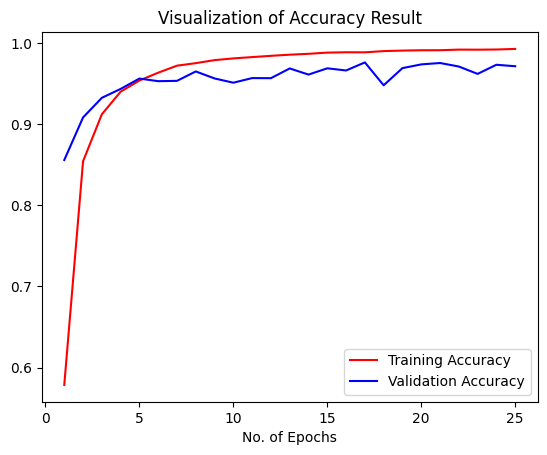

In [34]:
epochs = [i for i in range(1,26)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 58s 3ms/step


In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [39]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98       504
                                 Apple___Black_rot       1.00      0.99      1.00       497
                          Apple___Cedar_apple_rust       1.00      0.96      0.98       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.95      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.91      0.

### Confusion Matrix Visualization

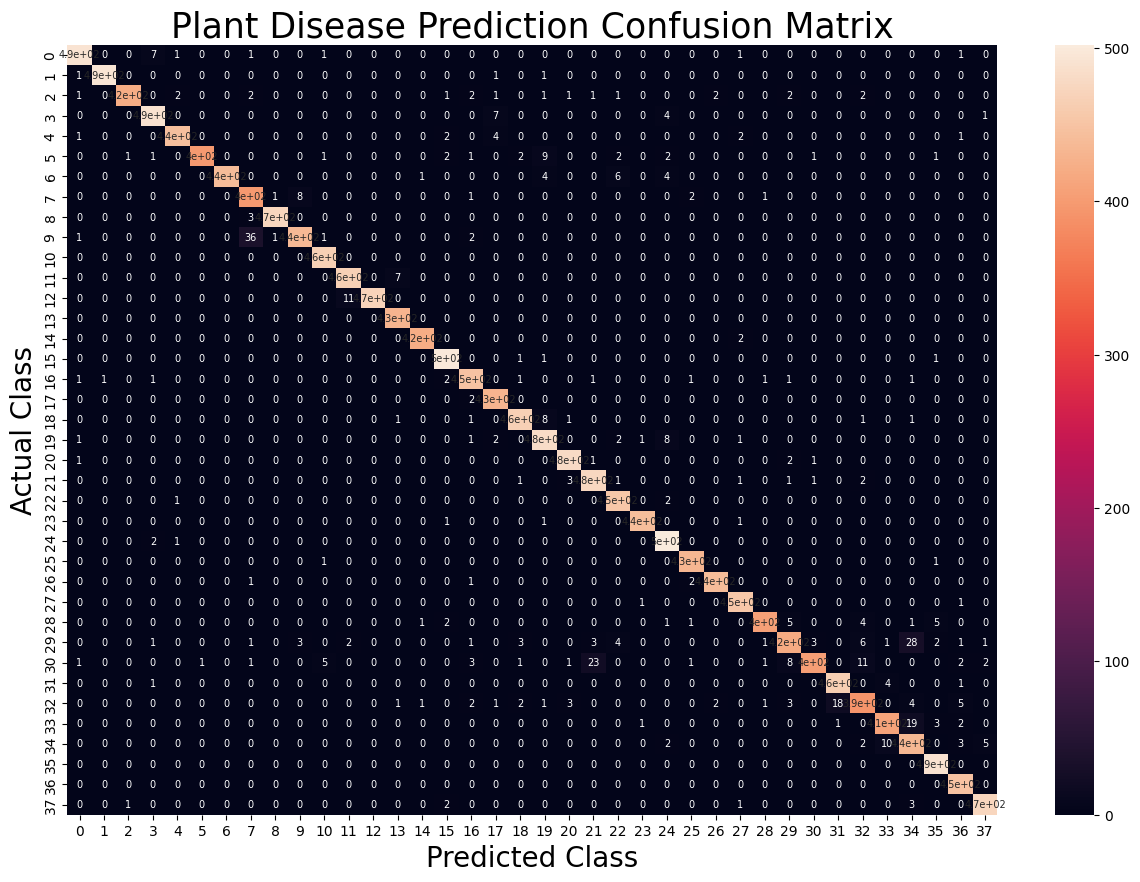

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 7})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()